<a href="https://colab.research.google.com/github/sky309/TEDXTALK-Prediction/blob/main/Sarvesh_Kumar_Yadav.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# About the Project:
This is a machine learning Capstone project


#Problem Statement:

TED is devoted to spreading powerful ideas on just about any topic. These datasets contain over 4,000 TED talks including transcripts in many languages. 
Founded in 1984 by Richard Salman as a nonprofit organization 
that aimed at bringing experts from the fields of Technology, Entertainment, and Design together, TED Conferences have gone on to become the Mecca of ideas from virtually all walks of life. As of 2015, TED and its sister TEDx chapters have published more than 2000 talks for free consumption by the masses and its speaker list boasts of the likes of Al Gore, Jimmy Wales, Shahrukh Khan, and Bill Gates. 
The main objective is to build a predictive model, which could help in predicting the views of the videos uploaded on the TEDx website.

# Business Goal:


# Structure of this Notebook:


# Data Set Glimpse:
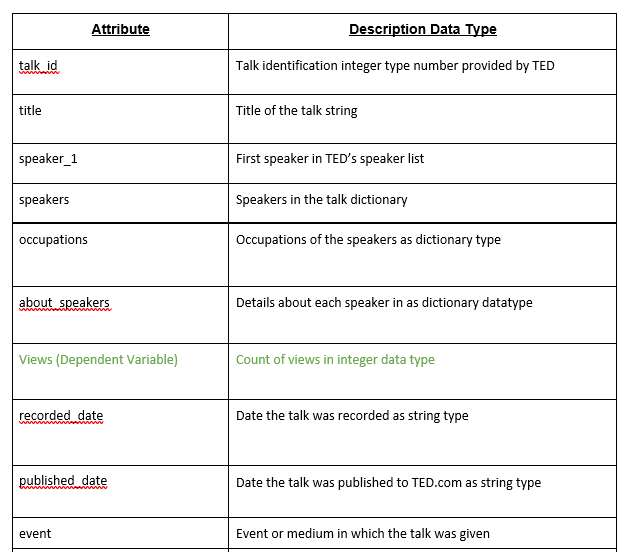

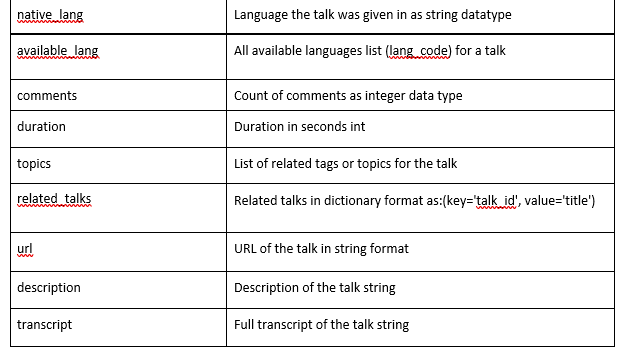

# Importing Libraires and  Packages

1. Numpy: 
2. Pandas
3. Matplotlib
4. Seaborn




In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.cluster import KMeans
import ast

%matplotlib inline

from sklearn.linear_model import SGDRegressor, ElasticNetCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, GridSearchCV

In [ ]:
import re, string, unicodedata
import nltk
import inflect
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer


In [ ]:
from keras.preprocessing.text import Tokenizer

In [ ]:
tokenizer = Tokenizer(num_words="MAX_NB_WORDS")

#Importing the file

In [ ]:
path= '/content/drive/MyDrive/AlmaBetter/Modules/Week-12-TedXTalk- Project/Copy of data_ted_talks.csv'

In [ ]:
data= pd.read_csv(path)

# EDA : Exploraroty data analysis:

In [ ]:
# Dataframe size
data.shape

(4005, 19)

In [ ]:
# Datasets inforamtion
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4005 entries, 0 to 4004
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   talk_id         4005 non-null   int64  
 1   title           4005 non-null   object 
 2   speaker_1       4005 non-null   object 
 3   all_speakers    4001 non-null   object 
 4   occupations     3483 non-null   object 
 5   about_speakers  3502 non-null   object 
 6   views           4005 non-null   int64  
 7   recorded_date   4004 non-null   object 
 8   published_date  4005 non-null   object 
 9   event           4005 non-null   object 
 10  native_lang     4005 non-null   object 
 11  available_lang  4005 non-null   object 
 12  comments        3350 non-null   float64
 13  duration        4005 non-null   int64  
 14  topics          4005 non-null   object 
 15  related_talks   4005 non-null   object 
 16  url             4005 non-null   object 
 17  description     4005 non-null   o

In [ ]:
# data's descriptions
data.describe(include= 'all')

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript
count,4005.000000,4005,4005,4001,3483,3502,4.005000e+03,4004,4005,4005,4005,4005,3350.000000,4005.000000,4005,4005,4005,4005,4005
unique,NaN,4005,3274,3306,2049,2977,NaN,1334,2962,459,12,3902,NaN,NaN,3977,4005,4005,4005,4005
top,NaN,The story of a girl,Alex Gendler,{0: 'Alex Gendler'},{0: ['writer']},{0: 'Alex Rosenthal takes everyday experiences...,NaN,2017-04-24,2017-09-07,TED-Ed,en,['en'],NaN,NaN,"['TED-Ed', 'math']","{900: 'A 3D atlas of the universe', 178: 'This...",https://www.ted.com/talks/priscilla_pemu_a_per...,"For the first time in history, the majority of...",When I knew I was going to come to speak to yo...
freq,NaN,1,34,34,53,10,NaN,97,27,556,3957,24,NaN,NaN,8,1,1,1,1
mean,12432.538327,NaN,NaN,NaN,NaN,NaN,2.148006e+06,NaN,NaN,NaN,NaN,NaN,161.997015,724.011236,NaN,NaN,NaN,NaN,NaN
std,17447.576262,NaN,NaN,NaN,NaN,NaN,3.451226e+06,NaN,NaN,NaN,NaN,NaN,268.838922,361.775462,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,0.000000,60.000000,NaN,NaN,NaN,NaN,NaN
25%,1252.000000,NaN,NaN,NaN,NaN,NaN,8.820690e+05,NaN,NaN,NaN,NaN,NaN,38.000000,393.000000,NaN,NaN,NaN,NaN,NaN
50%,2333.000000,NaN,NaN,NaN,NaN,NaN,1.375508e+06,NaN,NaN,NaN,NaN,NaN,89.000000,738.000000,NaN,NaN,NaN,NaN,NaN
75%,23777.000000,NaN,NaN,NaN,NaN,NaN,2.133110e+06,NaN,NaN,NaN,NaN,NaN,188.000000,974.000000,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Checking for duplicate values:
data[data.duplicated()]

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript


In [ ]:
# Checking for Null values
data.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        4
occupations       522
about_speakers    503
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [ ]:
# keeping copy of the origianl data
copied_data= data.copy()

In [ ]:
data['occupations'].fillna(str({0:['other']}),inplace=True,axis=0)

In [ ]:
data['occupations']=data['occupations'].apply(lambda x:[val for val in ast.literal_eval(x).values() ])

In [ ]:
# Filling null values of all_speakers by speaker_1
data['all_speakers'].fillna(str({0: [str(data['speaker_1'])]}), inplace=True,axis= 0)

In [ ]:
data['about_speakers'].fillna(str({0: str(data['occupations'])}), inplace= True, axis=0)

In [ ]:
data['about_speakers'].head(1)

0    {0: 'Nobel Laureate Al Gore focused the world’...
Name: about_speakers, dtype: object

In [ ]:
# Checking for all columns:
data.columns

Index(['talk_id', 'title', 'speaker_1', 'all_speakers', 'occupations',
       'about_speakers', 'views', 'recorded_date', 'published_date', 'event',
       'native_lang', 'available_lang', 'comments', 'duration', 'topics',
       'related_talks', 'url', 'description', 'transcript'],
      dtype='object')

In [ ]:
data.isna().sum()

talk_id             0
title               0
speaker_1           0
all_speakers        0
occupations         0
about_speakers      0
views               0
recorded_date       1
published_date      0
event               0
native_lang         0
available_lang      0
comments          655
duration            0
topics              0
related_talks       0
url                 0
description         0
transcript          0
dtype: int64

In [ ]:
# Checking for feature types:

numerical_features   = ['duration',]
temporal_features    = ['recorded_date' , 'published_date']
categorical_features = ['event']

meta_features        = ['topics']
text_corpus_features = ['title' , 'about_speakers' , 'occupations' , 'transcript' , 'description' ,]

irrelevant_features  = ['url' , 'all_speakers' , 'speaker_1' , 'native_lang']
unavailable_features = ['available_lang' , 'comments' , 'related_talks']

target = ['views']


all_features = numerical_features + temporal_features + categorical_features + meta_features + text_corpus_features + irrelevant_features + unavailable_features + target

# Formating the datetime type:

In [ ]:
from datetime import datetime

In [ ]:
today = datetime.now()
today.strftime('%Y-%m-%d')

'2021-09-09'

In [ ]:
# Recorded date fromate:
data['recorded_date']= pd.to_datetime(data['recorded_date'])

In [ ]:
# Formating the published date time:
data['published_date']= pd.to_datetime(data['published_date'])

# Generating new target variable , daily views:

In [ ]:
# Days taken to publish talk
data['days_taken_to_publish'] = data['published_date'] - data['recorded_date']

In [ ]:
# Period of day's talk has been published:
last_publishing_date = data['published_date'].max()

data['time_since_published'] = last_publishing_date - pd.DatetimeIndex(data['published_date'])

In [ ]:
# Daily views/Talk:
data['daily_views'] = data['views'] / ( data['time_since_published'].apply(lambda x : x.days) + 1 )

# Removing Irrelevant columns:

In [ ]:
# Droping out the columns talk_id, speaker_1, all_speakers
data.drop(['talk_id','time_since_published', 'speaker_1', 'all_speakers', 'url', 'comments', 'days_taken_to_publish', 'recorded_date', 'published_date', 'event'], axis=1, inplace = True)

# Feature Engineering:


In [ ]:
data

,title,occupations,about_speakers,views,native_lang,available_lang,duration,topics,related_talks,description,transcript,daily_views
0,Averting the climate crisis,[[climate advocate]],{0: 'Nobel Laureate Al Gore focused the world’...,3523392,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",With the same humor and humanity he exuded in ...,"Thank you so much, Chris. And it's truly a gre...",696.735614
1,The best stats you've ever seen,[[global health expert; data visionary]],"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",You've never seen data presented like this. Wi...,"About 10 years ago, I took on the task to teac...",2867.645837
2,Simplicity sells,[[technology columnist]],{0: 'David Pogue is the personal technology co...,1920832,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",New York Times columnist David Pogue takes aim...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",379.836267
3,Greening the ghetto,[[activist for environmental justice]],{0: 'Majora Carter redefined the field of envi...,2664069,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,"In an emotionally charged talk, MacArthur-winn...",If you're here today — and I'm very happy that...,526.808187
4,Do schools kill creativity?,"[[author, educator]]","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",Sir Ken Robinson makes an entertaining and pro...,Good morning. How are you? (Audience) Good. It...,12863.744117
...,...,...,...,...,...,...,...,...,...,...,...,...
4000,"Crisis support for the world, one text away",[[health activist]],"{0: 'Nancy Lublin, cofounder and CEO of Crisis...",502934,en,['en'],690,"['activism', 'data', 'technology', 'mental hea...",{2362: 'How data from a crisis text line is sa...,What if we could help people in crisis anytime...,"""I'm 14, and I want to go home."" ""My name is B...",125733.500000
4001,The dark history of IQ tests,[[other]],{0: '0 [[climate adv...,307187,en,"['en', 'es', 'my', 'pt-br']",346,"['TED-Ed', 'education', 'history', 'animation'...",{35386: 'How does the Rorschach inkblot test w...,"In 1905, psychologists Alfred Binet and Théodo...","In 1905, psychologists Alfred Binet and Théodo...",76796.750000
4002,"How ""policing for profit"" undermines your rights",[[law researcher]],{0: 'Dick M. Carpenter II studies cutting edge...,464414,en,['en'],774,"['society', 'law', 'policy', 'justice system',...","{2406: 'I love being a police officer, but we ...","Many countries have an active, centuries-old l...",Picture yourself driving down the road tomorro...,154804.666667
4003,The electrifying speeches of Sojourner Truth,[[other]],{0: '0 [[climate adv...,56582,en,['en'],257,"['TED-Ed', 'education', 'animation', 'United S...",{20973: 'The breathtaking courage of Harriet T...,Isabella Baumfree was born into slavery in lat...,"In early 1828, Sojourner Truth approached the ...",56582.000000


In [ ]:
data.describe(percentiles= [0.25, 0.50, 0.95, 0.99]).round().T

,count,mean,std,min,25%,50%,95%,99%,max
views,4005.0,2148006.0,3451226.0,0.0,882069.0,1375508.0,6182301.0,16299834.0,65051954.0
duration,4005.0,724.0,362.0,60.0,393.0,738.0,1231.0,1601.0,3922.0
daily_views,4005.0,3104.0,7463.0,0.0,418.0,1060.0,12427.0,28143.0,166073.0


In [ ]:
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    if(col_name<fence_low):
      x
    else:
      df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [ ]:
data['views'].quantile(0.25)

882069.0

In [ ]:
data['views'].quantile(0.75)

2133110.0

In [ ]:
data_views_iqr=  data['views'].quantile(0.75)-data['views'].quantile(0.25)

In [ ]:
data_views_iqr

1251041.0

In [ ]:
data['views'].mean()

2148005.5737827714

In [ ]:
data= [data['duration'], 'daily_views']]
fig = plt.figure(figsize =(10, 7))
 
# Creating axes instance
ax = fig.add_axes([0,0, 1, 1])
 
# Creating plot
bp = ax.boxplot(data)
 
# show plot
plt.show()

TypeError: ignored

{'boxes': [<matplotlib.lines.Line2D at 0x7f416cb09ed0>],
 'caps': [<matplotlib.lines.Line2D at 0x7f416cb13f50>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f416cb1af90>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7f416cb1aa50>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7f416cb134d0>,
  <matplotlib.lines.Line2D at 0x7f416cb13a10>]}

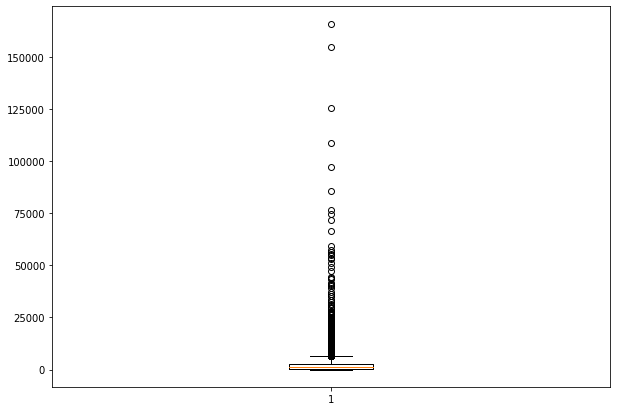

In [ ]:
plt.figure(figsize =(10, 7))
plt.boxplot(data['daily_views'])

In [ ]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    text= text.translate(translator)
    return text

In [ ]:
data['description'] = data['description'].apply(remove_punctuation)
data['description'].head(10)

0    With the same humor and humanity he exuded in ...
1    Youve never seen data presented like this With...
2    New York Times columnist David Pogue takes aim...
3    In an emotionally charged talk MacArthurwinnin...
4    Sir Ken Robinson makes an entertaining and pro...
5    Architect Joshua PrinceRamus takes the audienc...
6    When two young Mormon missionaries knock on Ju...
7    Philosopher Dan Dennett calls for religion  al...
8    Pastor Rick Warren author of The PurposeDriven...
9    Jehane Noujaim unveils her 2006 TED Prize wish...
Name: description, dtype: object

In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [ ]:
def stopwords(text):
    '''a function for removing the stopword'''
    # removing the stop words and lowercasing the selected words
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    # joining the list of words with space separator
    return " ".join(text)

In [ ]:
data['description'] = data['description'].apply(stopwords)
data['description'].head(10)

0    humor humanity exuded inconvenient truth al go...
1    youve never seen data presented like drama urg...
2    new york times columnist david pogue takes aim...
3    emotionally charged talk macarthurwinning acti...
4    sir ken robinson makes entertaining profoundly...
5    architect joshua princeramus takes audience da...
6    two young mormon missionaries knock julia swee...
7    philosopher dan dennett calls religion religio...
8    pastor rick warren author purposedriven life r...
9    jehane noujaim unveils 2006 ted prize wish bri...
Name: description, dtype: object

In [ ]:
from nltk.stem.wordnet import WordNetLemmatizer

In [ ]:
wnet= WordNetLemmatizer()

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
def lemmatize(text):    
    '''a function which stems each word in the given text'''
    text = [wnet.lemmatize(word) for word in text.split()]
    return " ".join(text) 

In [ ]:
data['description'] = data['description'].apply(lemmatize)

In [ ]:
data['description']

0       humor humanity exuded inconvenient truth al go...
1       youve never seen data presented like drama urg...
2       new york time columnist david pogue take aim t...
3       emotionally charged talk macarthurwinning acti...
4       sir ken robinson make entertaining profoundly ...
                              ...                        
4000    could help people crisis anytime anywhere simp...
4001    1905 psychologist alfred binet théodore simon ...
4002    many country active centuriesold law allows go...
4003    isabella baumfree born slavery late 18th centu...
4004    fuzzy sock overripe banana moldy tube toothpas...
Name: description, Length: 4005, dtype: object

In [ ]:
data['description'][0]

'humor humanity exuded inconvenient truth al gore spell 15 way individual address climate change immediately buying hybrid inventing new hotter brand name global warming'

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
# create the object of tfid vectorizer
tfid_vectorizer = TfidfVectorizer("english")

# fit the vectorizer using the text data
vectorized=tfid_vectorizer.fit_transform(data['description'])

# collect the vocabulary items used in the vectorizer
dictionary = tfid_vectorizer.vocabulary_.items()

In [ ]:
tfid_vectorizer.vocabulary_

{'humor': 8693,
 'humanity': 8671,
 'exuded': 6464,
 'inconvenient': 9023,
 'truth': 18772,
 'al': 791,
 'gore': 7704,
 'spell': 17090,
 '15': 64,
 'way': 19752,
 'individual': 9065,
 'address': 577,
 'climate': 3503,
 'change': 3192,
 'immediately': 8896,
 'buying': 2797,
 'hybrid': 8732,
 'inventing': 9395,
 'new': 12420,
 'hotter': 8602,
 'brand': 2542,
 'name': 12202,
 'global': 7621,
 'warming': 19699,
 'youve': 20296,
 'never': 12415,
 'seen': 16136,
 'data': 4545,
 'presented': 14169,
 'like': 10562,
 'drama': 5438,
 'urgency': 19260,
 'sportscaster': 17150,
 'statistic': 17275,
 'guru': 7938,
 'han': 8046,
 'rosling': 15592,
 'debunks': 4623,
 'myth': 12155,
 'socalled': 16878,
 'developing': 4963,
 'world': 20100,
 'york': 20271,
 'time': 18393,
 'columnist': 3678,
 'david': 4564,
 'pogue': 13875,
 'take': 17897,
 'aim': 751,
 'technology': 18031,
 'worst': 20122,
 'interfacedesign': 9311,
 'offender': 12756,
 'provides': 14408,
 'encouraging': 5963,
 'example': 6311,
 'produc

In [ ]:
data['days_taken_to_publish'] = data['published_date'] - data['recorded_date']

In [ ]:
last_publishing_date = data['published_date'].max()

data['time_since_published'] = last_publishing_date - pd.DatetimeIndex(data['published_date'])

In [ ]:
data['daily_views'] = data['views'] / ( data['time_since_published'].apply(lambda x : x.days) + 1 )

In [ ]:
data.head(2)

,talk_id,title,speaker_1,all_speakers,occupations,about_speakers,views,recorded_date,published_date,event,native_lang,available_lang,comments,duration,topics,related_talks,url,description,transcript,days_taken_to_publish,time_since_published,daily_views
0,1,Averting the climate crisis,Al Gore,{0: 'Al Gore'},{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,2006-02-25,2006-06-27,TED2006,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",272.0,977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",https://www.ted.com/talks/al_gore_averting_the...,humor humanity exuded inconvenient truth al go...,"Thank you so much, Chris. And it's truly a gre...",122 days,5056 days,696.735614
1,92,The best stats you've ever seen,Hans Rosling,{0: 'Hans Rosling'},{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,2006-02-22,2006-06-27,TED2006,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",628.0,1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",https://www.ted.com/talks/hans_rosling_the_bes...,youve never seen data presented like drama urg...,"About 10 years ago, I took on the task to teac...",125 days,5056 days,2867.645837


In [ ]:
# Droping out the columns talk_id, speaker_1, all_speakers
data.drop(['talk_id','time_since_published', 'speaker_1', 'all_speakers', 'url', 'comments', 'days_taken_to_publish', 'recorded_date', 'published_date', 'event'], axis=1, inplace = True)

In [ ]:
data.head()

,title,occupations,about_speakers,views,native_lang,available_lang,duration,topics,related_talks,description,transcript,daily_views
0,Averting the climate crisis,{0: ['climate advocate']},{0: 'Nobel Laureate Al Gore focused the world’...,3523392,en,"['ar', 'bg', 'cs', 'de', 'el', 'en', 'es', 'fa...",977,"['alternative energy', 'cars', 'climate change...","{243: 'New thinking on the climate crisis', 54...",humor humanity exuded inconvenient truth al go...,"Thank you so much, Chris. And it's truly a gre...",696.735614
1,The best stats you've ever seen,{0: ['global health expert; data visionary']},"{0: 'In Hans Rosling’s hands, data sings. Glob...",14501685,en,"['ar', 'az', 'bg', 'bn', 'bs', 'cs', 'da', 'de...",1190,"['Africa', 'Asia', 'Google', 'demo', 'economic...","{2056: ""Own your body's data"", 2296: 'A visual...",youve never seen data presented like drama urg...,"About 10 years ago, I took on the task to teac...",2867.645837
2,Simplicity sells,{0: ['technology columnist']},{0: 'David Pogue is the personal technology co...,1920832,en,"['ar', 'bg', 'de', 'el', 'en', 'es', 'fa', 'fr...",1286,"['computers', 'entertainment', 'interface desi...","{1725: '10 top time-saving tech tips', 2274: '...",new york time columnist david pogue take aim t...,"(Music: ""The Sound of Silence,"" Simon & Garfun...",379.836267
3,Greening the ghetto,{0: ['activist for environmental justice']},{0: 'Majora Carter redefined the field of envi...,2664069,en,"['ar', 'bg', 'bn', 'ca', 'cs', 'de', 'en', 'es...",1116,"['MacArthur grant', 'activism', 'business', 'c...",{1041: '3 stories of local eco-entrepreneurshi...,emotionally charged talk macarthurwinning acti...,If you're here today — and I'm very happy that...,526.808187
4,Do schools kill creativity?,"{0: ['author', 'educator']}","{0: ""Creativity expert Sir Ken Robinson challe...",65051954,en,"['af', 'ar', 'az', 'be', 'bg', 'bn', 'ca', 'cs...",1164,"['children', 'creativity', 'culture', 'dance',...","{865: 'Bring on the learning revolution!', 173...",sir ken robinson make entertaining profoundly ...,Good morning. How are you? (Audience) Good. It...,12863.744117


In [ ]:
X= data['description']

In [ ]:
sum_word= vectorized.sum(axis=0)
words_freq= [(word, sum_word[0, idx]) for word, idx in  tfid_vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse= True)
words_freq[:2]

[('talk', 79.52941219519032), ('world', 61.65189241535533)]

In [ ]:
def get_top_n_words(x,n):
  sum_word= vectorized.sum(axis=0)
  words_freq= [(word, sum_word[0, idx]) for word, idx in  tfid_vectorizer.vocabulary_.items()]
  words_freq = sorted(words_freq, key = lambda x: x[1], reverse= True)
  words_freq[:2]
  return words_freq[:n]

In [ ]:
get_top_n_words(X, 100)

[('talk', 79.52941219519032),
 ('world', 61.65189241535533),
 ('say', 57.85239174768918),
 ('share', 55.17235404552281),
 ('life', 52.1235170910463),
 ('make', 51.9565017137845),
 ('new', 50.270538377312555),
 ('people', 49.486071727517476),
 ('way', 46.460122898096394),
 ('show', 46.450691045150926),
 ('one', 45.32863902570483),
 ('story', 41.57618452921457),
 ('work', 41.01582445803435),
 ('like', 40.717924418174505),
 ('human', 38.609451162222065),
 ('ted', 36.49447032723574),
 ('help', 36.267544856729934),
 ('directed', 36.11309780609262),
 ('could', 35.35568460083408),
 ('narrated', 34.72361290083785),
 ('time', 32.33474671997948),
 ('year', 32.03064705776975),
 ('take', 32.01396346838619),
 ('change', 30.105400698241695),
 ('explains', 28.48396701235031),
 ('brain', 28.226234330708515),
 ('need', 28.006400087304588),
 ('music', 27.517504438768803),
 ('get', 27.31645225604265),
 ('even', 27.281010599079533),
 ('anderson', 27.127818998721168),
 ('think', 26.832697871149794),
 ('lea

In [ ]:
def f(x):
    try:
        return ast.literal_eval(x)
    except (ValueError, SyntaxError) as e:
        return val


In [ ]:
def f(x):
    try:
        return ast.literal_eval(x)   
    except Exception as e:
        return []


In [ ]:
data['about_speakers']= data['about_speakers'].apply(lambda x: f(x))

In [ ]:
data['about_speakers']

0       {0: 'Nobel Laureate Al Gore focused the world’...
1       {0: 'In Hans Rosling’s hands, data sings. Glob...
2       {0: 'David Pogue is the personal technology co...
3       {0: 'Majora Carter redefined the field of envi...
4       {0: 'Creativity expert Sir Ken Robinson challe...
                              ...                        
4000    {0: 'Nancy Lublin, cofounder and CEO of Crisis...
4001                                                   []
4002    {0: 'Dick M. Carpenter II studies cutting edge...
4003                                                   []
4004                                                   []
Name: about_speakers, Length: 4005, dtype: object

In [ ]:
data['occupations']= data['occupations'].apply(lambda x: f(x))

In [ ]:
data['occupations']

0                           {0: ['climate advocate']}
1       {0: ['global health expert; data visionary']}
2                       {0: ['technology columnist']}
3         {0: ['activist for environmental justice']}
4                         {0: ['author', 'educator']}
                            ...                      
4000                         {0: ['health activist']}
4001                                               []
4002                          {0: ['law researcher']}
4003                                               []
4004                                               []
Name: occupations, Length: 4005, dtype: object

In [ ]:
data.isna().sum()

title               0
occupations       522
about_speakers    503
views               0
native_lang         0
available_lang      0
duration            0
topics              0
related_talks       0
description         0
transcript          0
daily_views         0
dtype: int64